# Exercise 2: Logistic Regression

In [5]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_3/ex2/'
sys.path.append(path_to_modules)

from gradient import gradient
from sigmoid import sigmoid
from predict import predict
from plotDecisionBoundary import plotDecisionBoundary
from costFunction import costFunction
from plotData import plotData

import scipy.optimize as op
import matplotlib.pyplot as plt
import numpy as np

## Load Data
 The first two columns contains the exam scores and the third column
 contains the label.



In [6]:
data = np.loadtxt(path_to_modules + 'ex2data1.txt', delimiter =",")

X = data[:, 0:2] #x refers to the population size in 10,000s
y = data[:, 2] #y refers to the profit in $10,000s

m = y.size #umber of training examples

y = y.reshape((m,1))

## Part 1: Plotting
We start the exercise by first plotting the data to understand the 
  the problem we are working with.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


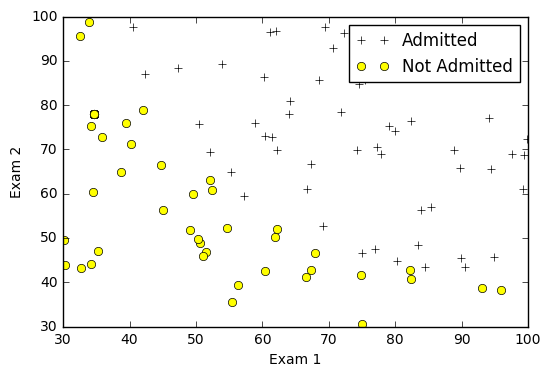

In [7]:
#scatter plot
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.")

line_pos, line_neg = plotData(X, y, "Exam 1","Exam 2", "Admitted","Not Admitted")

plt.legend(handles=[line_pos,line_neg])

plt.show(block=False)

## Part 2: Compute Cost and Gradient

In [8]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

#Add intercept term to x and X_test
X = np.c_[np.ones((m, 1)), X]

#Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

#Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y), gradient(initial_theta, X, y)

print("Cost at initial theta (zeros): ", cost, "\n")
print("Expected cost (approx): 0.693\n")
print('Gradient at initial theta (zeros): \n')
print(grad)
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")

#Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost, grad = costFunction(test_theta, X, y), gradient(test_theta, X, y)

print("\nCost at test theta:", cost, "\n")
print("Expected cost (approx): 0.218\n")
print("Gradient at test theta: \n")
print(grad)
print("Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n")

Cost at initial theta (zeros):  0.69314718056 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330193827 

Expected cost (approx): 0.218

Gradient at test theta: 

[[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



## Part 3: Optimizing using  scipy.optimize (equivalent to fminunc in matlab)

optimal theta [-25.1613187    0.20623159   0.20147149]


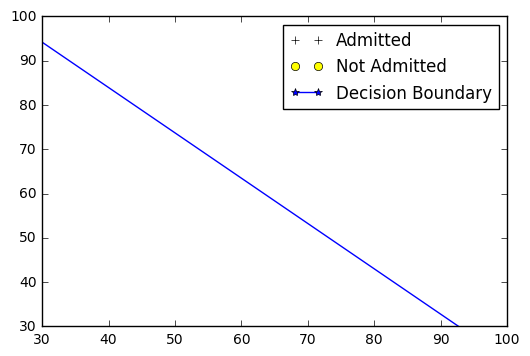

In [10]:
Result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y), method = 'TNC', jac = gradient)
optimal_theta = Result.x

print("optimal theta", optimal_theta)

#Plot Boundary
boundary_line = plotDecisionBoundary(optimal_theta, X, y)

plt.legend(handles=[line_pos,line_neg, boundary_line])

plt.show(block=False)

## Part 4: Predict and Accuracies 
  After learning the parameters, you'll like to use it to predict the outcomes
  on unseen data. In this part, you will use the logistic regression model
  to predict the probability that a student with score 45 on exam 1 and 
  score 85 on exam 2 will be admitted.

  Furthermore, you will compute the training and test set accuracies of 
  our model.

  Predict probability for a student with score 45 on exam 1 
  and score 85 on exam 2

In [11]:
theta  = optimal_theta

prob = sigmoid(np.dot(np.array([[1, 45, 85]]), theta))
print("For a student with scores 45 and 85, we predict an admission probability of f\n", prob)
print("Expected value: 0.775 +/- 0.002\n\n")

#Compute accuracy on our training set
p = predict(theta, X)
y = y.reshape((m))

print("Train Accuracy: ",np.multiply(np.mean((p == y).astype(int)), 100))
print("Expected accuracy (approx): 89.0\n")
print("\n")

For a student with scores 45 and 85, we predict an admission probability of f
 [ 0.77629062]
Expected value: 0.775 +/- 0.002


Train Accuracy:  89.0
Expected accuracy (approx): 89.0



